In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file,delimiter = ',')
        first_line = True
        temp_labels = []
        temp_images = []
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data,28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images,axis = 3)
testing_images = np.expand_dims(testing_images,axis = 3)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale = 1./255)
    
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/10
858/857 [==============================] - 61s 71ms/step - loss: 2.8602 - accuracy: 0.1414 - val_loss: 2.0542 - val_accuracy: 0.3758
Epoch 2/10
858/857 [==============================] - 61s 71ms/step - loss: 2.2041 - accuracy: 0.3119 - val_loss: 1.5906 - val_accuracy: 0.4491
Epoch 3/10
858/857 [==============================] - 61s 71ms/step - loss: 1.8080 - accuracy: 0.4245 - val_loss: 1.5541 - val_accuracy: 0.4866
Epoch 4/10
858/857 [==============================] - 55s 64ms/step - loss: 1.5200 - accuracy: 0.5097 - val_loss: 0.8855 - val_accuracy: 0.6849
Epoch 5/10
858/857 [==============================] - 59s 69ms/step - loss: 1.2998 - accuracy: 0.5773 - val_loss: 0.7531 - val_accuracy: 0.7489
Epoch 6/10
858/857 [==============================] - 59s 69ms/step - loss: 1.1367 - accuracy: 0.6321 - val_loss: 0.5983 - val_accuracy: 0.7886
Epoch 7/10
858/857 [==============================] - 60s 70ms/step - loss: 1.0106 - accuracy: 0.6713 - val_loss: 0.5139 - val_accuracy:

[176.90808018664708, 0.6359453]

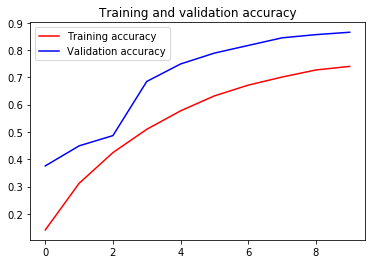

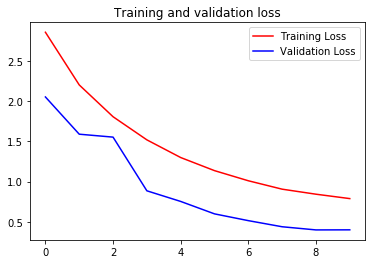

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()